# Callcenter calls

Om de verloven van het personeel van een call center te plannen wil men het aantal calls van de volgende 3 maand voorspellen aan de hand van Seasonal Decomposition Forecasting. Het aantal calls per maand vind je terug in het bestand `calls4jaar.csv` (oude examenvraag)

In [2]:
import pandas as pd
import numpy as np

alls4jaar = pd.read_csv('data/calls4jaar.csv', sep=';')
alls4jaar['AantalCalls'] = alls4jaar['AantalCalls'].astype(float)

display(alls4jaar)

,Jaar,Maand,AantalCalls
0,1,1,12808.0
1,1,2,13668.0
2,1,3,14087.0
3,1,4,7497.0
4,1,5,10716.0
5,1,6,8805.0
6,1,7,1783.0
7,1,8,2223.0
8,1,9,6320.0
9,1,10,4122.0


a) Bekijk met autocorrelatie wat de periode van de seizoen component is. Wat is de periode? Vergeet niet dat je daarvoor float-waarden moet hebben. Misschien moet je het aantal lags ook vergroten.

,lags,acf
15,0,1.000000
16,1,0.893862
14,-1,0.893862
13,-2,0.805378
17,2,0.805378
18,3,0.747794
12,-3,0.747794
3,-12,0.741301
27,12,0.741301
4,-11,0.720348


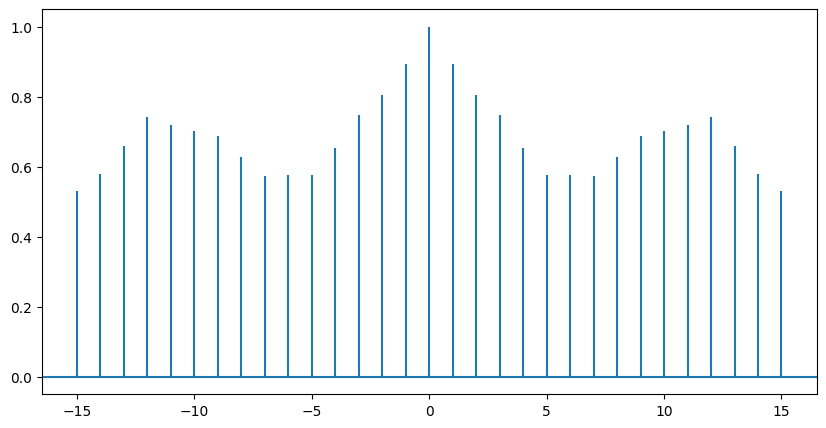

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

def find_period(y: np.array, maxlags=10, top_n=1) -> int:
    acf_vals = acf(y, nlags=maxlags)
    return (np.argsort(-1 * acf_vals)[1:top_n+1])

aantalCalls = alls4jaar['AantalCalls']  # Data

fig, ax = plt.subplots(figsize=(10, 5))
lags, acfs, _, _ = ax.acorr(aantalCalls, maxlags=15)
autocorrelatie = pd.DataFrame({'lags': lags, 'acf': acfs}).sort_values(by='acf', ascending=False)
display(autocorrelatie)

periode = find_period(aantalCalls, maxlags=20, top_n=1)
print("Periode:", periode)

# periode 12?

b) Hoe groot is de autocorrelatie voor deze periode?

In [70]:
autocorrelatieGroot = autocorrelatie['acf'].iloc[8]

print("Autocorrelatie Groot", autocorrelatieGroot)

periode = find_period(aantalCalls, maxlags=20, top_n=1)
print("Periode:", periode)

Autocorrelatie Groot 0.7413006737090464
Periode: [12]


c) Gaan we het additief of multiplicatief model gebruiken? Maak een grafiek van het aantal calls.

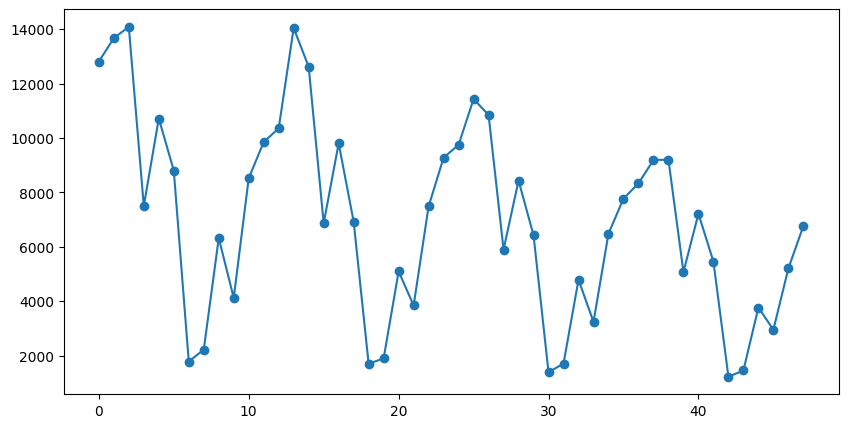

In [46]:
aantalCalls = alls4jaar['AantalCalls']  # Data

# Grafiek van aantal oproepen
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.plot(aantalCalls, marker='o')

# Multiplicatief

d) Als we de trend benaderen door een rechte, wat is de waarde van de slope (richtingscoëfficient)?

In [52]:
from W20P4.forecast import GeneralRegression
from statsmodels.tsa.seasonal import seasonal_decompose

aantalCalls = alls4jaar['AantalCalls']  # Data

sd_model = seasonal_decompose(aantalCalls, model='multiplicative', period=12)
data = sd_model.trend.dropna()

X = data.index.to_numpy()
y = data.to_numpy()

reg_model = GeneralRegression()
reg_model.fit(X, y)

display(reg_model.coef_)

# slope = -80.43607357
# De helling van de trend geeft de mate van stijging of daling van de tijdreeks aan in de loop van de tijd.
# In dit voorbeeld is de helling van de trend berekend als -80.44, wat aangeeft dat de tijdreeks afneemt met een snelheid van 80.44 eenheden per tijdseenheid.

array([  0.        , -80.43607357])

e) Geef de voorspelling voor de volgende 2 maand en maak ook een grafiek.

array([12296.19014135, 14746.09659952, 13932.88570743,  7600.97673783,
       10848.21585935,  8075.28148864,  1825.88276959,  2203.81487517,
        6170.75727277,  4296.23347052,  8624.98630509, 10370.36461633,
       10946.93037666, 13113.07623688, 12375.55045396,  6743.39674699,
        9612.64930732,  7146.72739571,  1613.89831129,  1945.45296416,
        5440.19785962,  3782.53186282,  7583.31533922,  9105.16439436,
        9597.67061198, 11480.05587424, 10818.21520048,  5885.81675615,
        8377.08275529,  6218.17330278,  1401.913853  ,  1687.09105315,
        4709.63844646,  3268.83025512,  6541.64437336,  7839.96417239,
        8248.4108473 ,  9847.0355116 ,  9260.879947  ,  5028.2367653 ,
        7141.51620326,  5289.61920986,  1189.9293947 ,  1428.72914213,
        3979.07903331,  2755.12864742,  5499.9734075 ,  6574.76395042])

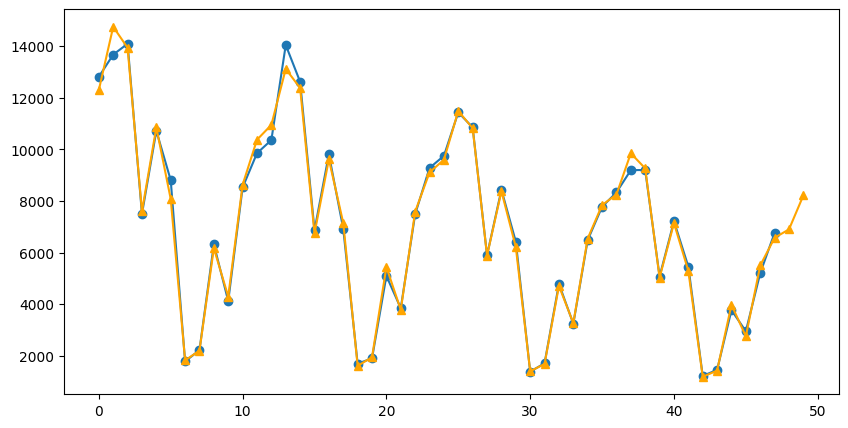

In [58]:
from W20P4.forecast import seasonal_decomposition_forecast

aantalCalls = alls4jaar['AantalCalls']  # Data

prediction = seasonal_decomposition_forecast(reg_model, sd_model, 0, 50, method='multiplicative', m=12)

fig, ax = plt.subplots(figsize=(10,5))
_ = ax.plot(aantalCalls, marker='o')
_ = ax.plot(prediction,marker='^', color='orange')

voorspelling = prediction[:-2]
display(voorspelling)

f) Geef de waarde van de MAPE voor het model.

In [66]:
aantalCalls = alls4jaar['AantalCalls']  # Data

MAPE = np.nanmean(np.abs(sd_model.resid / aantalCalls))

print("MAPE", MAPE)

MAE = np.nanmean(np.abs(sd_model.resid))
print("MAE:", MAE)

RMSE = np.sqrt(np.nanmean(np.square(sd_model.resid)))
print("RMSE:", RMSE)

MAPE 0.00021561747895948867
MAE: 0.9995420680999639
RMSE: 0.9999572783499118
